### Imports

In [163]:
%load_ext autoreloadhttp://localhost:8888/notebooks/pnl_cumsum.ipynb#
%autoreload 2
from prophet import Prophet
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### load data

In [191]:
date_pnl = pd.read_feather('date_pnl.feather')
train = date_pnl[(date_pnl.ds>pd.to_datetime('2022-09-15'))&(date_pnl.ds<pd.to_datetime('2023-09-15'))]
test = date_pnl[(date_pnl.ds>=pd.to_datetime('2023-09-01'))][['ds']]

### train and predict prophet

In [165]:
m = Prophet(changepoint_range=0.1, interval_width = 0.95)
m=m.fit(train)
forecast = m.predict(test)
fact = date_pnl[(date_pnl.ds>=pd.to_datetime('2022-09-01'))&(date_pnl.ds<=pd.to_datetime('2024-11-19'))][['ds','y']]
fact = fact.set_index('ds')
predict = forecast[(forecast.ds>=pd.to_datetime('2023-09-01'))&(forecast.ds<=pd.to_datetime('2024-11-19'))][['ds','yhat','yhat_lower', 'yhat_upper']]
predict= predict.set_index('ds')
predict['fact'] = fact[(fact.index>=pd.to_datetime('2023-09-01'))&(fact.index<=pd.to_datetime('2024-11-19'))][['y']]

10:53:38 - cmdstanpy - INFO - Chain [1] start processing
10:53:38 - cmdstanpy - INFO - Chain [1] done processing


### plot results

<IPython.core.display.Javascript object>


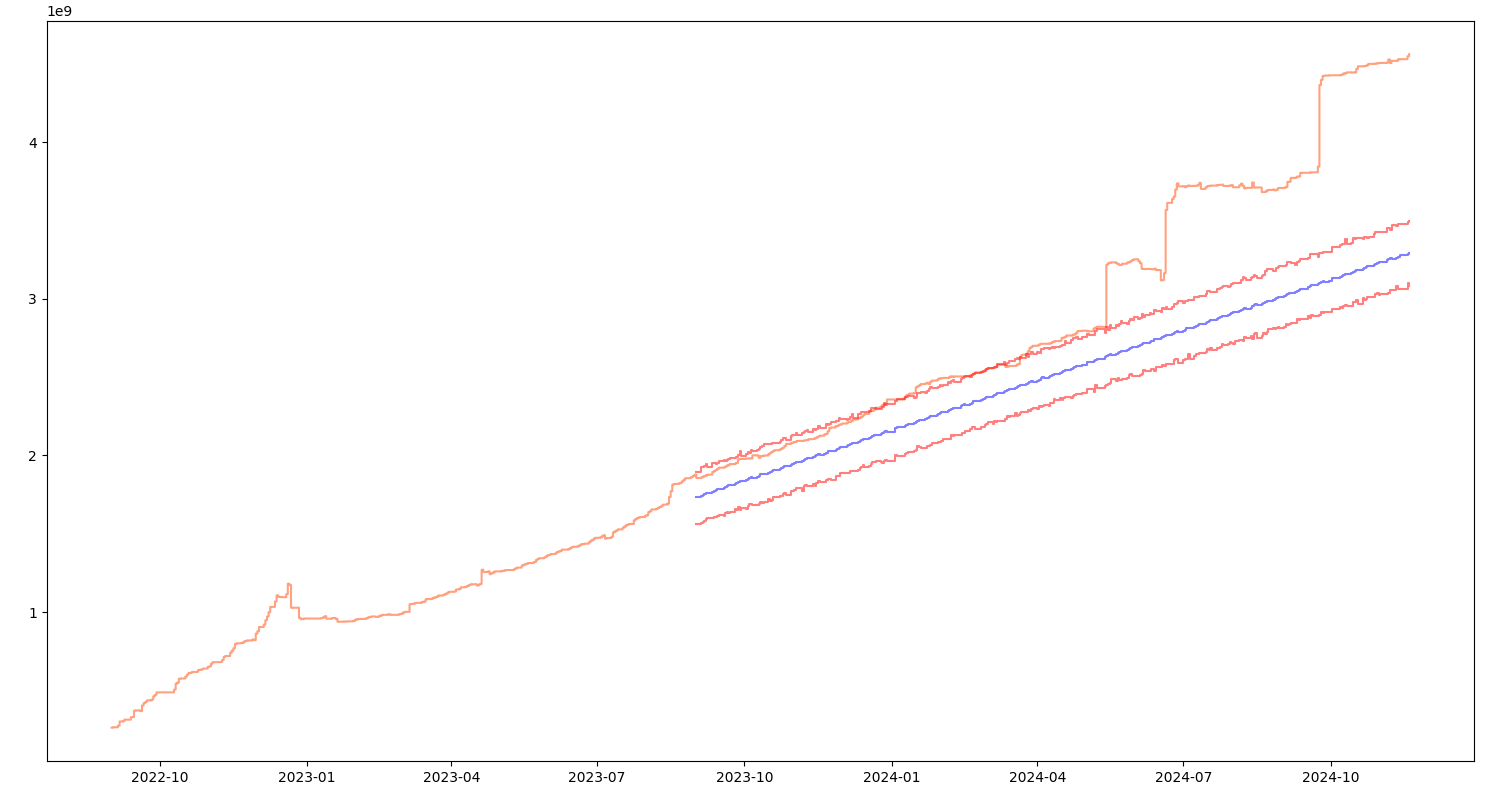

In [173]:
%matplotlib notebook
 
f, (a0) = plt.subplots(1,1, gridspec_kw={'height_ratios': [1]},figsize=(15, 8), sharex=True)
f.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

a0.step(fact.index, fact['y'], c = 'orangered', where = 'post',alpha = 0.5)
a0.step(predict.index, predict['yhat'], c = 'blue', where = 'post',alpha = 0.5)
a0.step(predict.index, predict['yhat_lower'], c = 'red', where = 'post',alpha = 0.5)
a0.step(predict.index, predict['yhat_upper'], c = 'red', where = 'post',alpha = 0.5)

### get MAPE

In [174]:
from sklearn.metrics import mean_absolute_percentage_error

In [180]:
mean_absolute_percentage_error(predict['fact'], predict['yhat'])

0.13579607043302208

### Save data

In [183]:
predict.reset_index().to_feather('predict.feather')

In [184]:
fact.reset_index().to_feather('fact.feather')

In [186]:
predict.to_excel('predict.xlsx')

In [189]:
fact.to_excel('fact.xlsx')